In [10]:
import ROOT as rt
import uproot
#from root_numpy import root2array, tree2array
#from root_pandas import read_root
import h5py 

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import numpy as np
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math

try:
    import setGPU
except:
    os.environ['KERAS_BACKEND'] = 'tensorflow'
    os.environ['CUDA_VISIBLE_DEVICES'] = '5'

In [11]:
def convert(tree, training_vars):
    array = tree.arrays()    
    df = pd.DataFrame(array, columns=training_vars)

    return df

In [12]:
training_vars = [b'fatJet1Pt_JERUp', b'fatJet1Pt_JERDown', b'fatJet1Pt', 
                 b'fatJet2Pt_JERUp', b'fatJet2Pt_JERDown', b'fatJet2Pt',
                 b'fatJet1PtOverMHH_JERUp', b'fatJet1PtOverMHH_JERDown', b'fatJet1PtOverMHH', 
                 b'fatJet2PtOverMHH_JERUp', b'fatJet2PtOverMHH_JERDown', b'fatJet2PtOverMHH',
                 b'hh_pt_JERUp', b'hh_pt_JERDown', b'hh_pt', 
                 b'hh_eta_JERUp', b'hh_eta_JERDown', b'hh_eta',
                 b'hh_mass_JERUp', b'hh_mass_JERDown', b'hh_mass']

aug_vars = [b'event']

w_var = [b'weight']

path = '/storage/af/user/nlu/work/HH/ntuples/20210712_regression_v2/option5/combined/BDT/2016/HHSM/'
#'/storage/af/user/schen7/CMSSW_9_4_2/src/Higgs/HHbbgg/HHbbggAna/condor/output/'
SIGNAL_FILE = uproot.open(path + 'GluGluToHHTo4B_node_cHHH1_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root')
BKG_FILE = uproot.open(path + 'GluGluToHHTo4B_node_cHHH1_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root')
    
sigtree = SIGNAL_FILE['Events']
bkgtree = BKG_FILE['Events']

sig_frame_all = convert(sigtree, training_vars + aug_vars + w_var)
bkg_frame_all = convert(bkgtree, training_vars + aug_vars + w_var)

#print(sig_frame_all.iloc[:1])

#select events with cuts
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

sig_frame = sig_frame_all[sig_frame_all[b'fatJet1Pt'] > 0][sig_frame_all[b'fatJet2Pt'] > 0][training_vars]
bkg_frame = bkg_frame_all[bkg_frame_all[b'fatJet1Pt'] > 0][bkg_frame_all[b'fatJet2Pt'] > 0][training_vars]

sig_df = sig_frame_all[sig_frame_all[b'fatJet1Pt'] > 0][sig_frame_all[b'fatJet2Pt'] > 0][training_vars + w_var + aug_vars]
bkg_df = bkg_frame_all[bkg_frame_all[b'fatJet1Pt'] > 0][bkg_frame_all[b'fatJet2Pt'] > 0][training_vars + w_var + aug_vars]

#print(sig_frame[training_vars].head(), bkg_frame[training_vars].head())
#print(sig_frame.head(), bkg_frame.head())

mean and std:  396.98688 107.493416
1 b'fatJet1Pt_JERUp'
2 b'fatJet1Pt_JERDown'
3 b'fatJet1Pt'
mean and std:  382.44974 108.040886
4 b'fatJet2Pt_JERUp'
5 b'fatJet2Pt_JERDown'
6 b'fatJet2Pt'
mean and std:  0.46228567 0.06961563
7 b'fatJet1PtOverMHH_JERUp'
8 b'fatJet1PtOverMHH_JERDown'
9 b'fatJet1PtOverMHH'
mean and std:  0.44435194 0.06598249
10 b'fatJet2PtOverMHH_JERUp'
11 b'fatJet2PtOverMHH_JERDown'
12 b'fatJet2PtOverMHH'
mean and std:  112.7827 96.97616
13 b'hh_pt_JERUp'
14 b'hh_pt_JERDown'
15 b'hh_pt'
mean and std:  0.007245718 2.6542523
16 b'hh_eta_JERUp'
17 b'hh_eta_JERDown'
18 b'hh_eta'
mean and std:  866.49994 226.66185
19 b'hh_mass_JERUp'
20 b'hh_mass_JERDown'
21 b'hh_mass'


<Figure size 432x288 with 0 Axes>

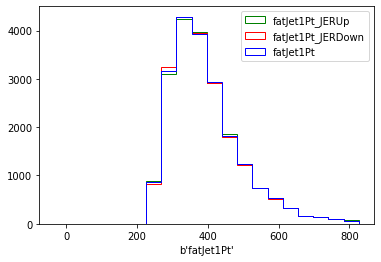

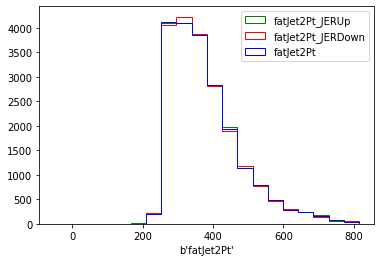

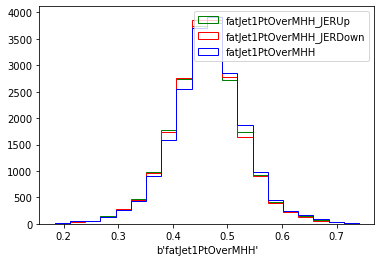

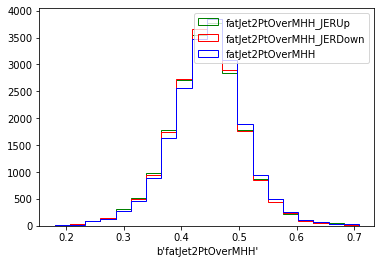

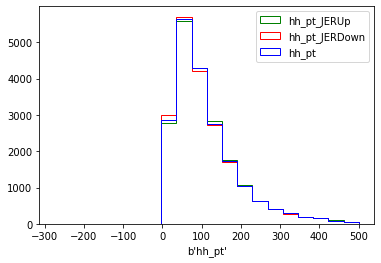

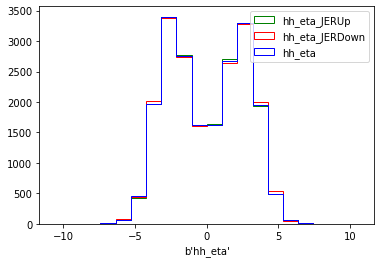

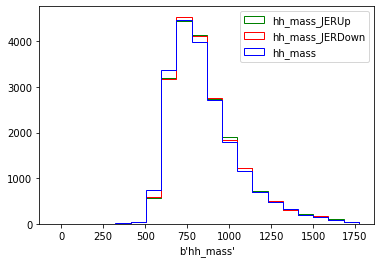

In [13]:
plt.figure()
color=['green','red','blue']
i=0
mean=0
std=0
for hlf in training_vars:
    if(i%3==0):
        plt.figure()
        mean=sig_df[hlf].mean()
        std=sig_df[hlf].std()
        print("mean and std: ",mean,std)
    plt.hist(sig_df[hlf], bins=20, density=False, weights=sig_df[b'weight'],
             histtype='step', label=hlf, color=color[i%3], range=(mean-4.*std, mean+4.*std))
    #plt.hist(bkg_df[hlf], bins=40, density=True, weights=bkg_df[b'weight'], 
    #         histtype='step', label='background')
    plt.xlabel(hlf)
    plt.legend(loc='best')
    i+=1
    print(i, hlf)